# Summer Olympics Data Analysis Assignment

In [3]:
#First of all we need to import numpy, pandas for working with datasets.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# We need to read the csv dataset using pandas and convert it to dataframe
df = pd.read_csv('summer.csv')

In [5]:
#printing the no. of rows and columns and the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [6]:
df.describe()

,Year
count,31165.000000
mean,1970.482785
std,33.158416
min,1896.000000
25%,1948.000000
50%,1980.000000
75%,2000.000000
max,2012.000000


In [7]:
#No. of null values in DataFrame
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [8]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


### 1. In how many cities Summer Olympics is held so far?

In [9]:
#To find the no. of cities in which Summer Olympics is held so far, we need to use unique() property
print('The total no. of Cities in which Summer Olympics has been held so far are:  {}'.format(len(df['City'].unique())))
print('The names of the Cities are: ')
for city in df['City'].unique():
  print(city)

The total no. of Cities in which Summer Olympics has been held so far are:  22
The names of the Cities are: 
Athens
Paris
St Louis
London
Stockholm
Antwerp
Amsterdam
Los Angeles
Berlin
Helsinki
Melbourne / Stockholm
Rome
Tokyo
Mexico
Munich
Montreal
Moscow
Seoul
Barcelona
Atlanta
Sydney
Beijing


### 2. Which sport is having most number of Gold Medals so far? (Top 5)

In [10]:
print('Total no. of Gold Medals ',len(df[df['Medal']=='Gold']))

('Total no. of Gold Medals ', 10486)


In [11]:
gold_count = []
df_gold = df[df['Medal']=='Gold']
for value in df_gold['Discipline'].unique():
    gold_count.append([value , len(df_gold[df_gold['Discipline']  == value])])
gold_count

[['Swimming', 901],
 ['Athletics', 1215],
 ['Cycling Road', 107],
 ['Cycling Track', 250],
 ['Fencing', 552],
 ['Artistic G.', 752],
 ['Shooting', 384],
 ['Tennis', 92],
 ['Weightlifting', 200],
 ['Wrestling Gre-R', 180],
 ['Water polo', 299],
 ['Archery', 126],
 ['Basque Pelota', 2],
 ['Cricket', 12],
 ['Croquet', 4],
 ['Jumping', 114],
 ['Football', 503],
 ['Golf', 13],
 ['Polo', 22],
 ['Rowing', 890],
 ['Rugby', 78],
 ['Sailing', 412],
 ['Tug of War', 36],
 ['Diving', 130],
 ['Boxing', 239],
 ['Lacrosse', 28],
 ['Roque', 1],
 ['Wrestling Free.', 193],
 ['Hockey', 486],
 ['Jeu de Paume', 1],
 ['Rackets', 3],
 ['Figure skating', 9],
 ['Water Motorspor', 5],
 ['Dressage', 88],
 ['Eventing', 112],
 ['Modern Pentath.', 58],
 ['Vaulting', 6],
 ['Ice Hockey', 8],
 ['Basketball', 342],
 ['Canoe / Kayak F', 304],
 ['Handball', 321],
 ['Judo', 123],
 ['Volleyball', 312],
 ['Canoe / Kayak S', 30],
 ['Synchronized S.', 52],
 ['Rhythmic G.', 31],
 ['Table Tennis', 46],
 ['Badminton', 46],
 ['Bas

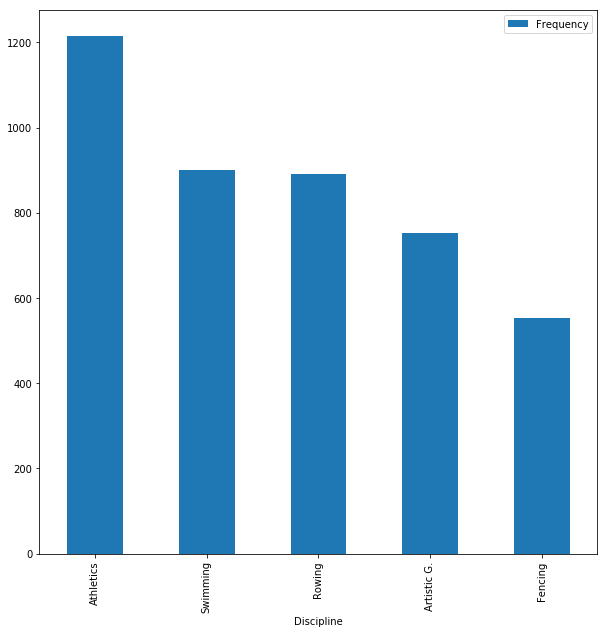

In [12]:
#plot a bar graph 
pd.DataFrame(gold_count,columns = ['Discipline','Frequency']).sort_values(by='Frequency', ascending=False).head().plot(x = 'Discipline', y = 'Frequency', kind = 'bar', figsize = (10,10))

### 3. Which sport is having most number of medals so far? (Top 5)

In [13]:
#The Sport which has most no. of medals must be appearing max no. of times in the Discipline column in df.
print('The sport having most number of Medals so far is:')
print(df['Discipline'].value_counts().idxmax())
print('And The number of medals are:')
df['Discipline'].value_counts().head(1)

The sport having most number of Medals so far is:
Athletics
And The number of medals are:


Athletics    3638
Name: Discipline, dtype: int64

In [14]:
#The Sport which has most no. of medals must be appearing max no. of times in the Discipline column in df.
print('The top 5 sport having most number of Medals so far is:')
print('And The number of medals are:')
df_5=df['Discipline'].value_counts().head(5)
df_5=df_5.to_frame().reset_index().rename(columns={'index':'Sports','Discipline':'No. Of medals'})
df_5

The top 5 sport having most number of Medals so far is:
And The number of medals are:


,Sports,No. Of medals
0,Athletics,3638
1,Rowing,2667
2,Swimming,2628
3,Artistic G.,2103
4,Fencing,1613


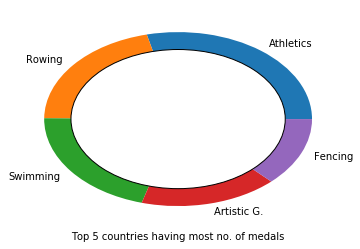

In [15]:
most_no_of_medals = df['Discipline'].value_counts().head(5)
most_no_of_medals = plt.pie(most_no_of_medals, labels=most_no_of_medals.index)
pr_pie_circle = plt.Circle((0,0), 0.8, color='black', fc='white', linewidth=1)
p=plt.gcf()
p.gca().add_artist(pr_pie_circle)
plt.xlabel('Top 5 countries having most no. of medals')
plt.show()


### 4. Which player has won most number of medals? (Top 5)

In [16]:
#The player who has most no. of medals must be appearing max no. of times in the Athlete column in df.
print('The Player having most number of Medals is:')
print(df['Athlete'].value_counts().idxmax())
print('And The number of medals are:')
df['Athlete'].value_counts().head(1)

The Player having most number of Medals is:
PHELPS, Michael
And The number of medals are:


PHELPS, Michael    22
Name: Athlete, dtype: int64

In [17]:
#The player who has most no. of medals must be appearing max no. of times in the Athlete column in df.
print('The top 5 Player having most number of Medals is:')
print('And The number of medals are:')
df_5=df['Athlete'].value_counts().head(5)
df_5=pd.DataFrame(df_5).reset_index().rename(columns={'index':'Player','Athlete':'No. Of medals'})
df_5

The top 5 Player having most number of Medals is:
And The number of medals are:


,Player,No. Of medals
0,"PHELPS, Michael",22
1,"LATYNINA, Larisa",18
2,"ANDRIANOV, Nikolay",15
3,"SHAKHLIN, Boris",13
4,"MANGIAROTTI, Edoardo",13


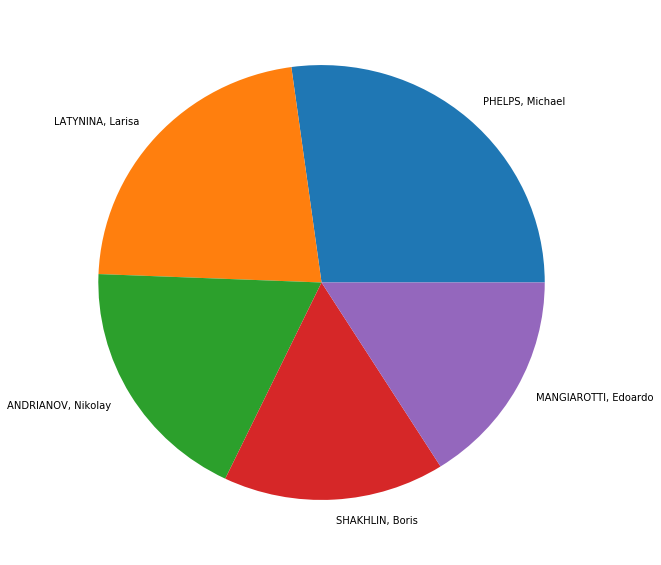

In [18]:
#df_5.plot(x = 'Player', y = 'No. Of medals', kind = 'pie', figsize = (5,5))
#plt.show()
y =df_5.to_numpy()
mylabels= y[:,0]
plt.figure(figsize=(10,10))
plt.pie(y[:,-1],labels=mylabels)
plt.show()

### 5. Which player has won most number Gold Medals of medals? (Top 5)

In [19]:
#The player who has most no. of gold medals must be appearing max no. of times in the Athlete column in df_gold.
print('The Player having most number of Gold Medals is:')
print(df_gold['Athlete'].value_counts().idxmax())
print('And The number of medals are:')
df_gold['Athlete'].value_counts().head(1)

The Player having most number of Gold Medals is:
PHELPS, Michael
And The number of medals are:


PHELPS, Michael    18
Name: Athlete, dtype: int64

In [20]:
#The player who has most no. of gold medals must be appearing max no. of times in the Athlete column in df_gold.
print('The top 5 Player having most number of Gold Medals is:')
print('And The number of medals are:')
df_5=df_gold['Athlete'].value_counts().head(5)
df_5=pd.DataFrame(df_5).reset_index().rename(columns={'index':'Player','Athlete':'No. Of medals'})
df_5

The top 5 Player having most number of Gold Medals is:
And The number of medals are:


,Player,No. Of medals
0,"PHELPS, Michael",18
1,"LEWIS, Carl",9
2,"NURMI, Paavo",9
3,"LATYNINA, Larisa",9
4,"SPITZ, Mark",9


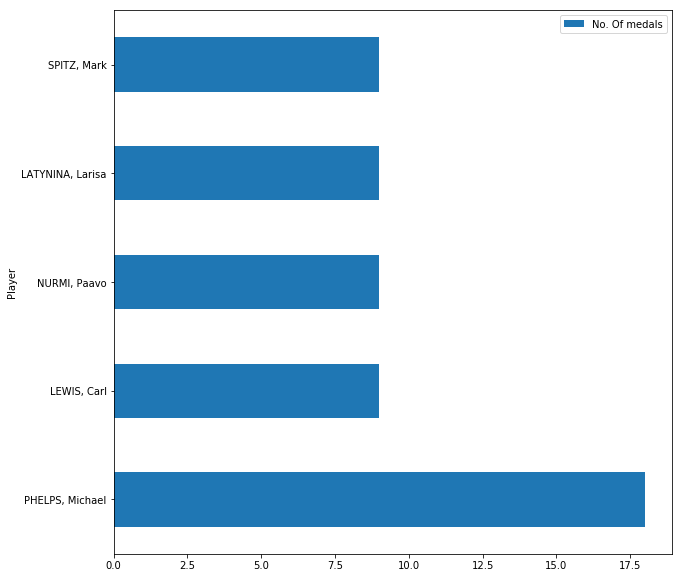

In [21]:
df_5.plot(x = 'Player', y = 'No. Of medals', kind = 'barh', figsize = (10,10))
plt.show()

### 6. In which year India won first Gold Medal in Summer Olympics?

In [22]:
#First we have to filter the dataframe where the country is india and Medal is Gold
df_india_gold = df_gold[df_gold['Country']=='IND']
df_india_gold

#As we can see there are 128 rows.

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5512,1928,Amsterdam,Hockey,Hockey,"ALLEN, Richard James",IND,Men,Hockey,Gold
5513,1928,Amsterdam,Hockey,Hockey,"CHAND, Dyan",IND,Men,Hockey,Gold
5514,1928,Amsterdam,Hockey,Hockey,"GATELEY, Maurice A.",IND,Men,Hockey,Gold
5515,1928,Amsterdam,Hockey,Hockey,"GILL, K. S.",IND,Men,Hockey,Gold
5516,1928,Amsterdam,Hockey,Hockey,"GOODSIR-CULLEN, William John",IND,Men,Hockey,Gold
5517,1928,Amsterdam,Hockey,Hockey,"HAMMOND, Leslie Charles",IND,Men,Hockey,Gold
5518,1928,Amsterdam,Hockey,Hockey,"KHAN, Feroze Uddin",IND,Men,Hockey,Gold
5519,1928,Amsterdam,Hockey,Hockey,"MARTHINS, George E.",IND,Men,Hockey,Gold
5520,1928,Amsterdam,Hockey,Hockey,"NORRIS, Rex A.",IND,Men,Hockey,Gold
5521,1928,Amsterdam,Hockey,Hockey,"PINNIGER, Broome Eric",IND,Men,Hockey,Gold


In [23]:
print('India won its First Gold Medal in Summer Olympics in Year:')
df_india_gold.sort_values(by='Year').head(1)['Year'].values[0]

India won its First Gold Medal in Summer Olympics in Year:


1928

### 7. Which event is most popular in terms on number of players? (Top 5)

In [24]:
print('The event which is most popular in terms of number of players is :')
print(df['Event'].value_counts().idxmax())
print('And the number of players')
df['Event'].value_counts().head(1).values[0]

The event which is most popular in terms of number of players is :
Football
And the number of players


1497

In [25]:
print('The top 5 event which is most popular in terms of number of players is :')
print('And the number of players')
df_5=df['Event'].value_counts().head(5)
df_5=pd.DataFrame(df_5).reset_index().rename(columns={'index':'Events','Event':'No. Of Players'})
df_5

The top 5 event which is most popular in terms of number of players is :
And the number of players


,Events,No. Of Players
0,Football,1497
1,Hockey,1422
2,Team Competition,1147
3,Basketball,1012
4,Handball,973


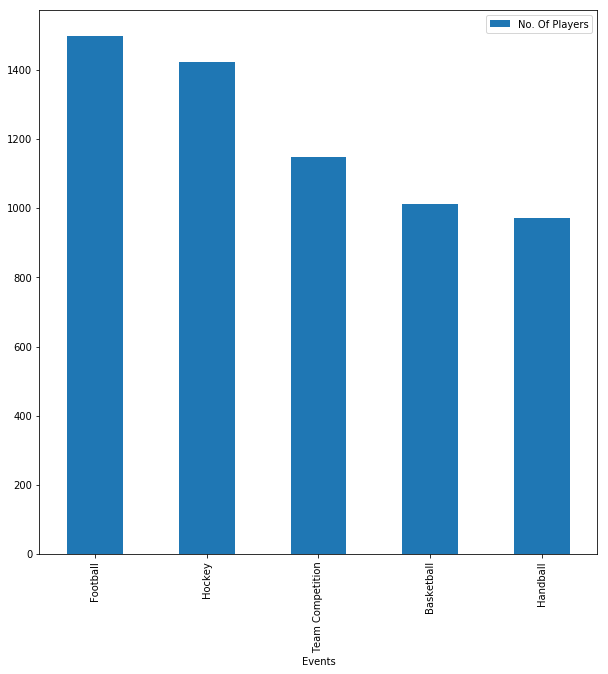

In [26]:
df_5.plot(x = 'Events', y = 'No. Of Players', kind = 'bar', figsize = (10,10))
plt.show()

### 8. Which sport is having most female Gold Medalists? (Top 5)

In [27]:
df_female = df_gold[df_gold['Gender']=='Women']
df_female['Sport'].value_counts()

Aquatics             589
Athletics            389
Gymnastics           268
Rowing               217
Volleyball           166
Hockey               144
Handball             142
Basketball           120
Fencing              108
Football              86
Canoe / Kayak         76
Softball              60
Equestrian            51
Cycling               45
Shooting              43
Judo                  42
Archery               39
Sailing               38
Tennis                38
Weightlifting         28
Table Tennis          23
Badminton             23
Taekwondo             16
Wrestling             12
Canoe                  9
Modern Pentathlon      4
Triathlon              4
Skating                4
Boxing                 3
Golf                   1
Name: Sport, dtype: int64

In [28]:
print('The sport having most female gold medalist is :')
print(df_female['Sport'].value_counts().idxmax())
print('And the number of female players are :')
df_female['Sport'].value_counts().head(1).values[0]

The sport having most female gold medalist is :
Aquatics
And the number of female players are :


589

In [29]:
print('The top 5 sport having most female gold medalist is :')
print('And the number of players are :')
df_5=df_female['Sport'].value_counts().head(5)
df_5=df_5.to_frame().reset_index().rename(columns={'index':'Sports','Sport':'No. Of Players'})
df_5

The top 5 sport having most female gold medalist is :
And the number of players are :


,Sports,No. Of Players
0,Aquatics,589
1,Athletics,389
2,Gymnastics,268
3,Rowing,217
4,Volleyball,166


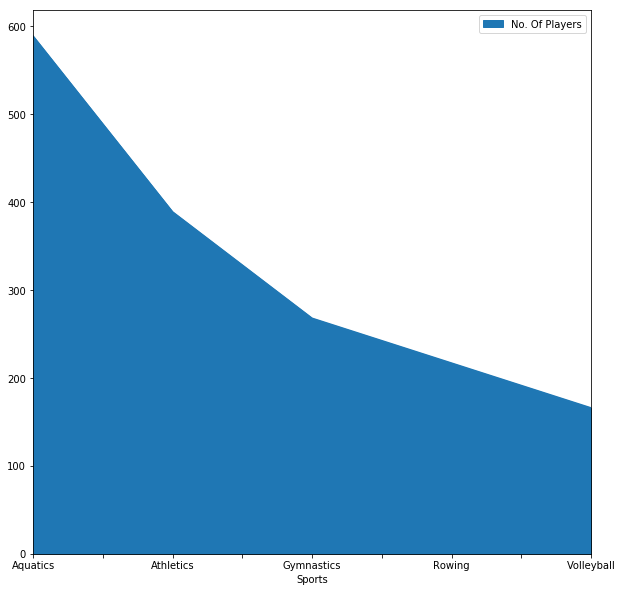

In [30]:
df_5.plot(x = 'Sports', y = 'No. Of Players', kind = 'area', figsize = (10,10))
plt.show()